# Dataset and Library
The dataset that will be used in this notebook is the [CIFAR-10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html) which is a pre-defined dataset consisting of 60000 32x32 colour images in 10 classes, with 6000 images per class. The Python library is [Keras](https://keras.io/about/) which is a deep learning API running on top of the TensorFlow. 

#Viewing, Loading and Normalizing the Dataset

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [ ]:
# Loading the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


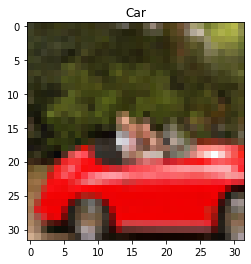

In [ ]:
# Loop through each picture in the data set
for i in range(100):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class ID
    image_class_number = y_train[i][0]
    # Look up the class name from the class ID
    image_class_name = cifar10_class_names[image_class_number]
    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)

In [ ]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Creating the Neural Network and adding the layers

In [ ]:
# Create a model and add layers
model = Sequential()

In [ ]:
# Adding a convolutional layer
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))

In [ ]:
# Adding a layer for max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Adding a dropout layer
model.add(Dropout(0.25))

In [ ]:
# Adding another convolutional layer
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))

In [ ]:
# Adding a layer for max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Adding a dropout layer
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
# Adding dense layers to the model
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

#Training the Neural Network and saving the weights

In [ ]:
# Training the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/50
1563/1563 [==============================] - 271s 172ms/step - loss: 1.5603 - accuracy: 0.4279 - val_loss: 1.2806 - val_accuracy: 0.5373
Epoch 2/50
1563/1563 [==============================] - 279s 178ms/step - loss: 1.1681 - accuracy: 0.5840 - val_loss: 0.9928 - val_accuracy: 0.6527
Epoch 3/50
1563/1563 [==============================] - 260s 166ms/step - loss: 1.0136 - accuracy: 0.6429 - val_loss: 0.8714 - val_accuracy: 0.6965
Epoch 4/50
1563/1563 [==============================] - 259s 166ms/step - loss: 0.9216 - accuracy: 0.6760 - val_loss: 0.8379 - val_accuracy: 0.7011
Epoch 5/50
1563/1563 [==============================] - 270s 173ms/step - loss: 0.8566 - accuracy: 0.6997 - val_loss: 0.7988 - val_accuracy: 0.7213
Epoch 6/50
1563/1563 [==============================] - 270s 173ms/step - loss: 0.8086 - accuracy: 0.7148 - val_loss: 0.7805 - val_accuracy: 0.7243
Epoch 7/50
1563/1563 [==============================] - 261s 167ms/step - loss: 0.7697 - accuracy: 0.7308 - val_

In [ ]:
# Saving neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

4384

In [ ]:
# Save neural network's trained weights
model.save_weights("model_weights.h5")

#Making predictions with the trained Neural Network

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import keras.utils as image
import numpy as np
from keras.applications import vgg16

In [ ]:
# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [ ]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

In [ ]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [ ]:
# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [ ]:
# Load an image file to test, resizing it to 64x64 pixels (as required by this model)
img = image.load_img("/content/sample_data/test_images/frog.png", target_size=(32, 32))

In [ ]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

In [ ]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

In [ ]:
# Make a prediction using the model
results = model.predict(list_of_images)

1/1 [==============================] - 0s 111ms/step


In [ ]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [ ]:
# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [ ]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

In [ ]:
# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Frog - Likelihood: 0.837464


#Using VGG16 as a pre-trained network in Keras

In [ ]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16()
img = image.load_img("/content/sample_data/test_images/bay.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)
predictions = model.predict(x)
predicted_classes = vgg16.decode_predictions(predictions)

print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

1/1 [==============================] - 1s 703ms/step
Top predictions for this image:
Prediction: seashore - 0.395213
Prediction: promontory - 0.326129
Prediction: lakeside - 0.119613
Prediction: breakwater - 0.062801
Prediction: sandbar - 0.045267
